# Project 7
## Energy consumption prediction
## Machine Learning
### Supervised Learning(Regression)
### Model : Linear Regression
### Data Content
* This company produces several types of coils, steel plates, and iron plates. The information on electricity consumption is held in a cloud-based system. The information on energy consumption of the industry is stored on the website of the Korea Electric Power Corporation (pccs.kepco.go.kr), and the perspectives on daily, monthly, and annual data are calculated and shown.

#### Attribute Information:
* Date Continuous-time data taken on the first of the month
* Usage_kWh Industry Energy Consumption Continuous kWh
* Lagging Current reactive power Continuous kVarh
* Leading Current reactive power Continuous kVarh
* CO2 Continuous ppm
* NSM Number of Seconds from midnight Continuous S
* Week status Categorical (Weekend (0) or a Weekday(1))
* Day of week Categorical Sunday, Monday : Saturday
* Load Type Categorical Light Load, Medium Load, Maximum Load

* link(https://www.kaggle.com/datasets/csafrit2/steel-industry-energy-consumption/data)

### load data

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# import data 
data =  pd.read_csv("Steel_industry_data.csv")
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [25]:
# checking missing values 
data.isna().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [26]:
data.shape

(35040, 11)

In [27]:
data.dtypes

date                                     object
Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
WeekStatus                               object
Day_of_week                              object
Load_Type                                object
dtype: object

## EDA(Exploratory Data Analysis)

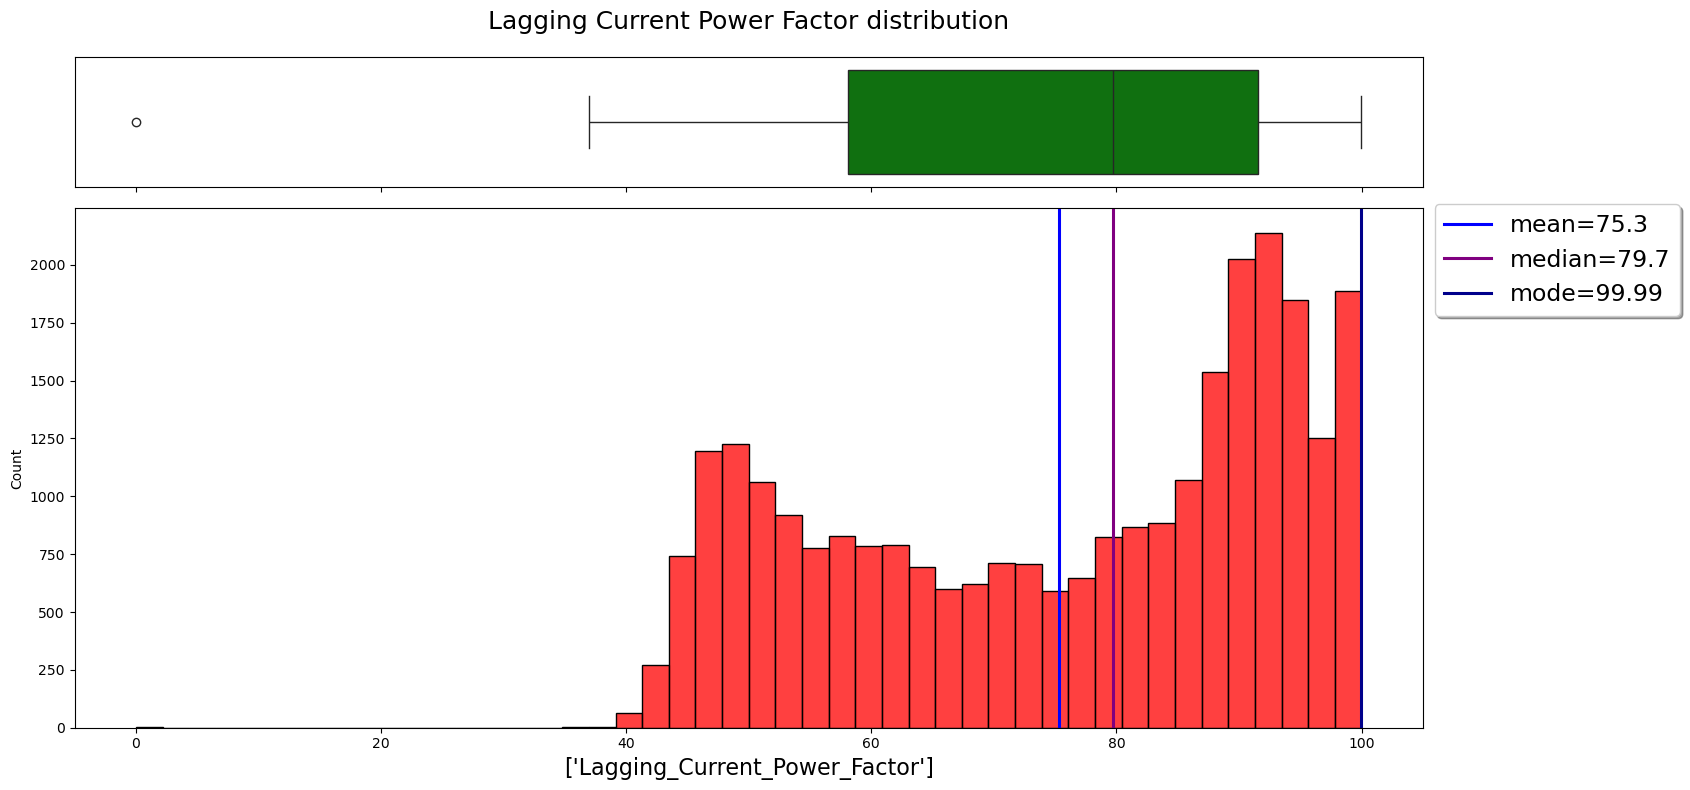

In [57]:
col = ['Lagging_Current_Power_Factor']
df_filtered = data[data['Lagging_Current_Power_Factor'] != 100]
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(17,8),gridspec_kw={"height_ratios": (.2, .8)})
ax[0].set_title('Lagging Current Power Factor distribution',fontsize=18,pad=20)
sns.boxplot(x='Lagging_Current_Power_Factor', data=df_filtered, ax=ax[0], color="g")
ax[0].set(yticks=[])
sns.histplot(x='Lagging_Current_Power_Factor', data=df_filtered, ax=ax[1], color="r")
ax[1].set_xlabel(col, fontsize=16)
plt.axvline(df_filtered['Lagging_Current_Power_Factor'].mean(), color='blue', linewidth=2.2, label='mean=' + str(np.round(df_filtered['Lagging_Current_Power_Factor'].mean(),1)))
plt.axvline(df_filtered['Lagging_Current_Power_Factor'].median(), color='purple', linewidth=2.2, label='median='+ str(np.round(df_filtered['Lagging_Current_Power_Factor'].median(),1)))
plt.axvline(df_filtered['Lagging_Current_Power_Factor'].mode()[0], color='darkblue', linewidth=2.2, label='mode='+ str(df_filtered['Lagging_Current_Power_Factor'].mode()[0]))
plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
plt.tight_layout()
plt.show()

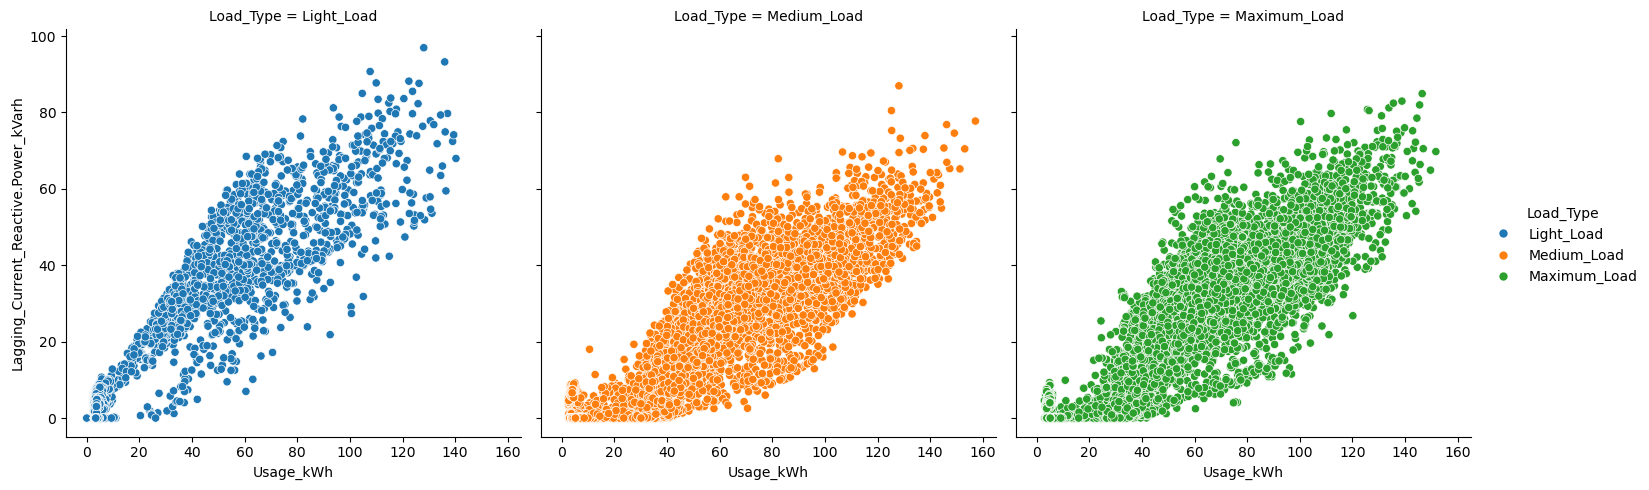

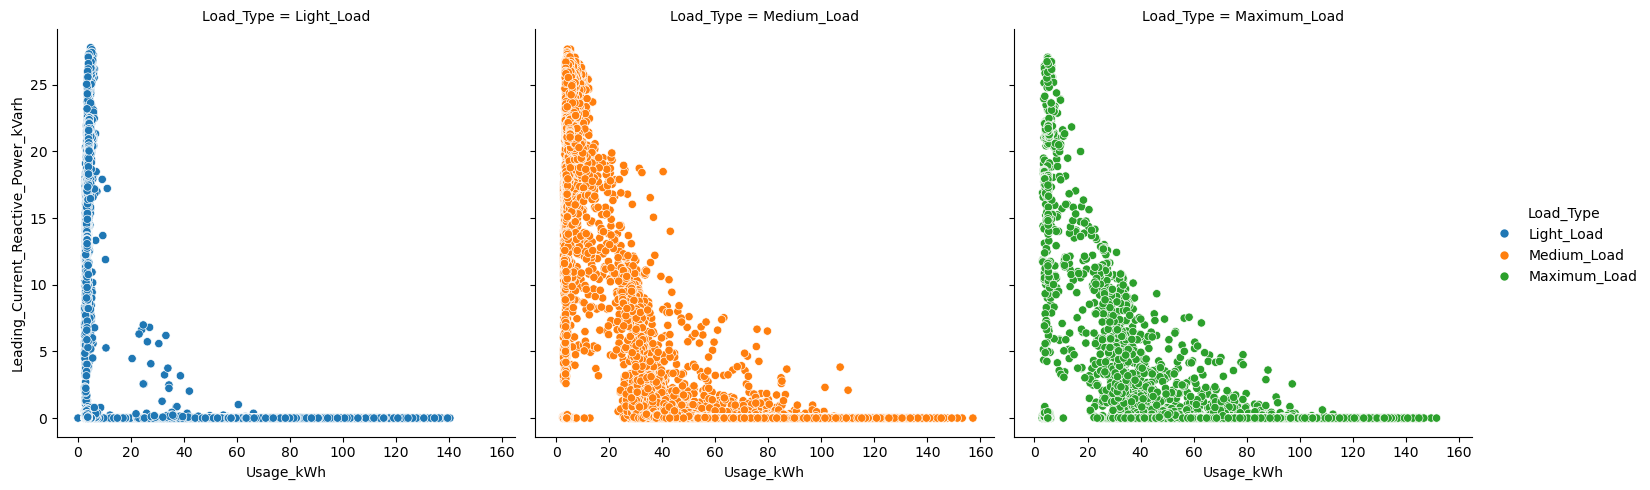

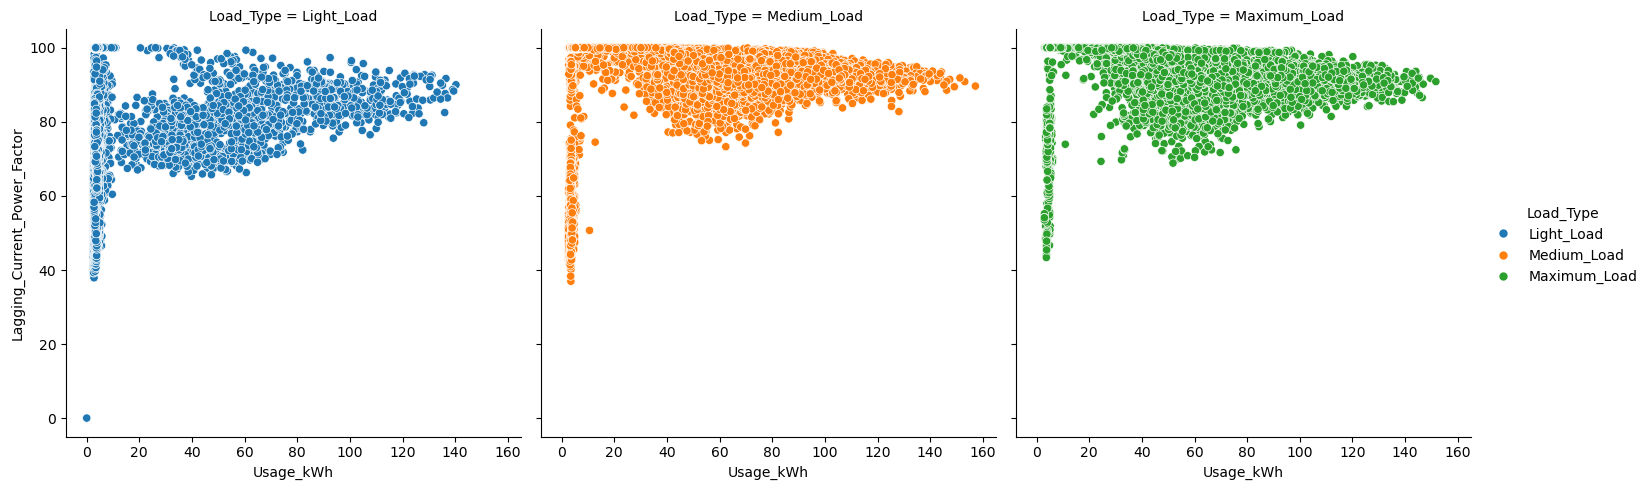

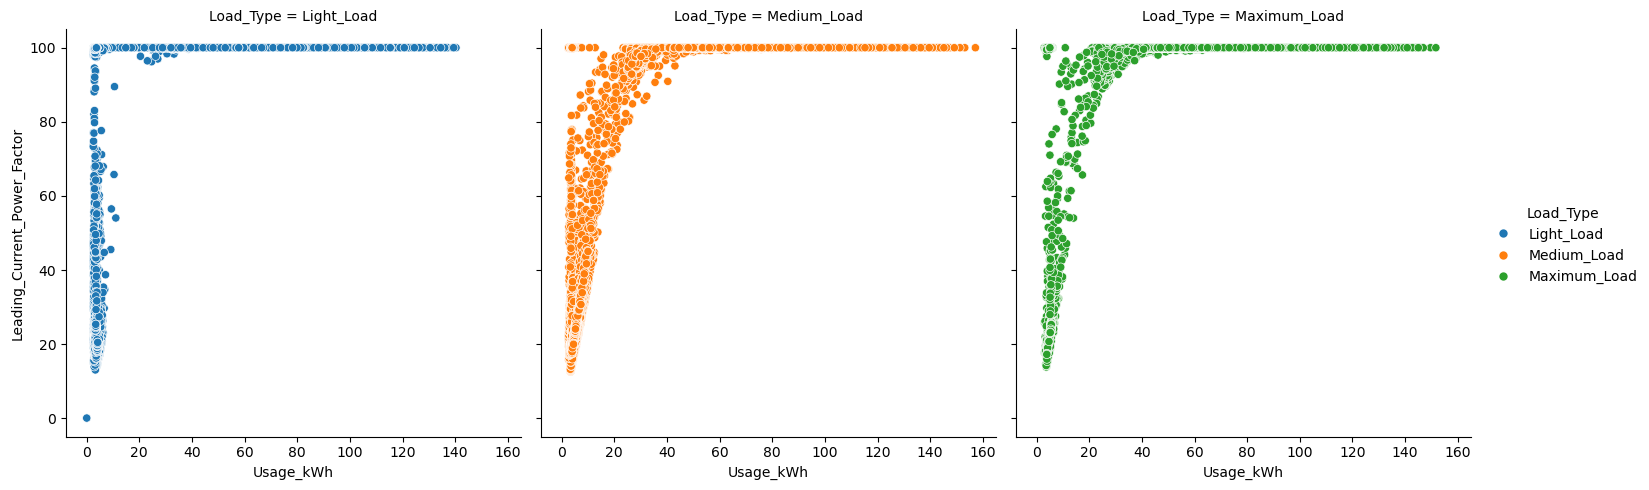

In [29]:
sns.relplot(data=data, x="Usage_kWh", y="Lagging_Current_Reactive.Power_kVarh", hue="Load_Type",col="Load_Type",palette='tab10');
sns.relplot(data=data, x="Usage_kWh", y="Leading_Current_Reactive_Power_kVarh", hue="Load_Type",col="Load_Type",palette='tab10');
sns.relplot(data=data, x="Usage_kWh", y="Lagging_Current_Power_Factor", hue="Load_Type",col="Load_Type",palette='tab10');
sns.relplot(data=data, x="Usage_kWh", y="Leading_Current_Power_Factor", hue="Load_Type",col="Load_Type",palette='tab10');

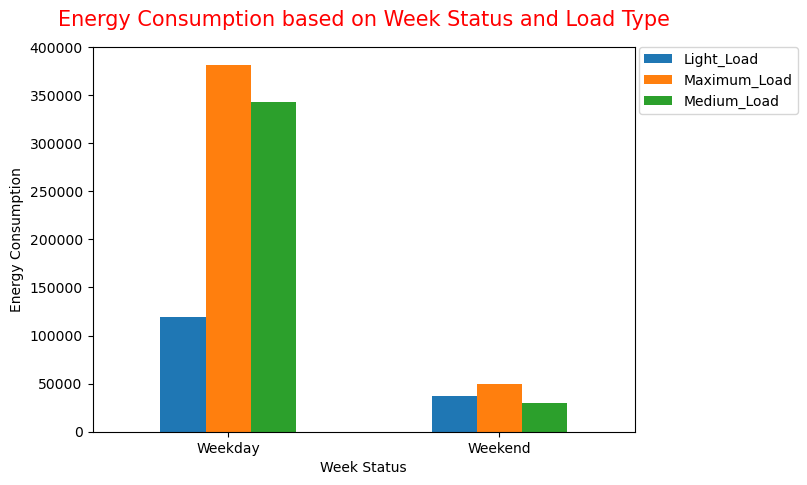

In [30]:
#visualize energy consumption based on week status and load type
plt.rcParams['figure.figsize'] = (7,5)
chart = data.groupby(['WeekStatus','Load_Type'])['Usage_kWh'].sum().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Energy Consumption based on Week Status and Load Type', fontsize = 15, pad = 15, color = 'r')
plt.xlabel('Week Status')
plt.ylabel('Energy Consumption')
plt.legend(bbox_to_anchor = (1.3, 1), borderaxespad = 0)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_1980\1883201774.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Load_Type', data = data, palette = 'tab10', edgecolor = 'white', linewidth = 1.2)


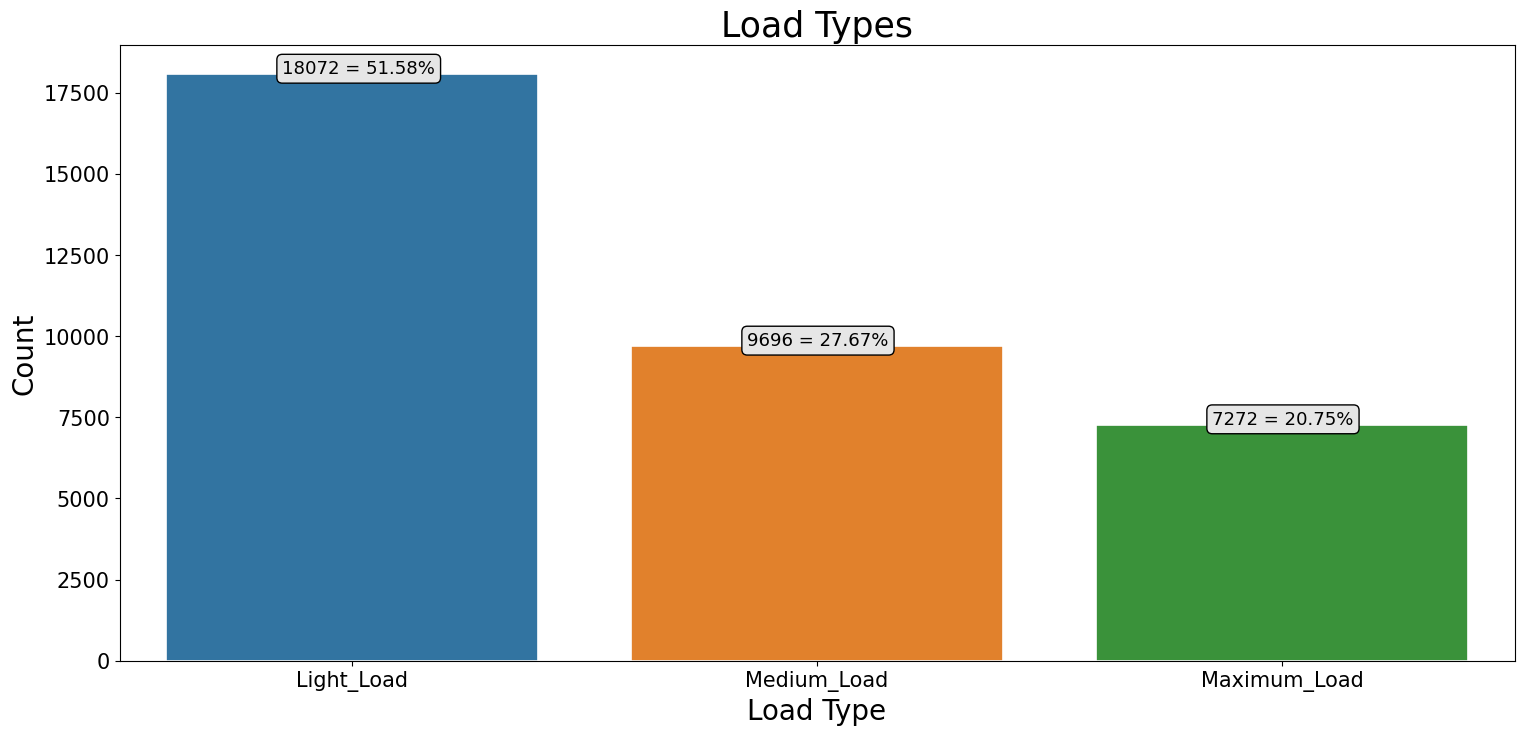

In [31]:
#Disaster count(Whether the disaster happened or not )
plt.figure(figsize = (18, 8))
ax = plt.axes()
ax = sns.countplot(x = 'Load_Type', data = data, palette = 'tab10', edgecolor = 'white', linewidth = 1.2)
plt.title('Load Types', fontsize = 25)
plt.xlabel('Load Type', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
ax.xaxis.set_tick_params(labelsize = 15)
ax.yaxis.set_tick_params(labelsize = 15)
bbox_args = dict(boxstyle = 'round', fc = '0.9')
for p in ax.patches:
        ax.annotate('{:.0f} = {:.2f}%'.format(p.get_height(), (p.get_height() / len(data['Load_Type'])) * 100), (p.get_x() + 0.25, p.get_height() + 10),
                   bbox = bbox_args,
                   fontsize = 13)
plt.show()

In [32]:
data.dtypes

date                                     object
Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
WeekStatus                               object
Day_of_week                              object
Load_Type                                object
dtype: object

#### so we have some data in object type firstly wen will have to convert data to date time dtype

In [34]:
# unfortunatly we cant covert to datetime dtype due to the improper format of the data so lets set as the index
df = data.set_index("date")
df.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
date,,,,,,,,,,
01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


## Modeling

In [37]:
# import libraies 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# initialising  LabelEncoder
encoder = LabelEncoder()

# assinging features and labels 
x = df.drop('Usage_kWh', axis = 1)
y = df['Usage_kWh']

# encoding data 
for coll in x:
    x[coll]  = encoder.fit_transform(x[coll])
    
# splitting to train and test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# viewing data shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(28032, 9)
(28032,)
(7008, 9)
(7008,)


In [38]:
x.dtypes

Lagging_Current_Reactive.Power_kVarh    int64
Leading_Current_Reactive_Power_kVarh    int64
CO2(tCO2)                               int64
Lagging_Current_Power_Factor            int64
Leading_Current_Power_Factor            int64
NSM                                     int64
WeekStatus                              int32
Day_of_week                             int32
Load_Type                               int32
dtype: object

### Creating model

linear regression

In [39]:
# importing model
from sklearn.linear_model import LinearRegression 

# initialise model 
li_model = LinearRegression(n_jobs=-1)

## fit with data
li_model.fit(x_train, y_train)


LinearRegression(n_jobs=-1)

In [40]:
# make prediction
li_pred = li_model.predict(x_test)

In [45]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
accurcy =  r2_score(li_pred, y_test)
print(f"acurracy: {accurcy*100:.2f}%")
print('Mean Absolute Error : ', mean_absolute_error(y_test, li_pred))
print('Mean Squared Error : ',mean_squared_error(y_test, li_pred))
print('Root Mean Squared Error : ', sqrt(mean_squared_error(y_test, li_pred)))

acurracy: 98.41%
Mean Absolute Error :  2.5300054346180456
Mean Squared Error :  17.808963299582803
Root Mean Squared Error :  4.22006674112896


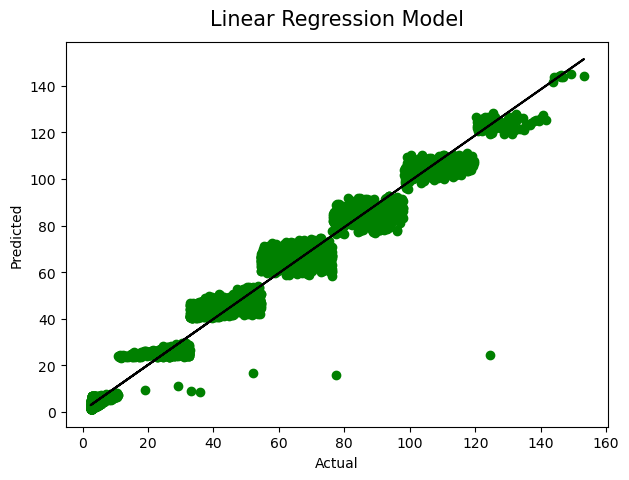

In [49]:
#evaluate with chart
plt.title('Linear Regression Model', fontsize = 15, pad = 12)
plt.plot(y_test, li_pred, 'o', color = 'g')

m, b = np.polyfit(y_test, li_pred, 1)
plt.plot(y_test, m * y_test + b, color = 'black')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Looks like our model is performin well 98.41%

## Putting everything i one code block

In [60]:
#data proccecing
import pandas as pd
import numpy as np

# data processing 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#modeling
from sklearn.linear_model import LinearRegression

#Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

#set up random seed 
np.random.seed(42)
#load data
df = pd.read_csv("Steel_industry_data.csv")

#set date as index
df = df.set_index("date")

#Assing features and labels 
x = df.drop("Usage_kWh", axis=1)
y = df["Usage_kWh"]

# intializing LabelEncoder
encoder = LabelEncoder()

#encoding data
for col in x:
    x[col] = encoder.fit_transform(x[col])

x_train , x_test,y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# initialise Model 
model = LinearRegression(n_jobs=-1)

# fitting with data 
model.fit(x_train, y_train)


LinearRegression(n_jobs=-1)

In [61]:
#model evaluation
pred = model.predict(x_test)
accurcy =  r2_score(pred, y_test)
print(f"acurracy: {accurcy*100:.2f}%")
print('Mean Absolute Error : ', mean_absolute_error(y_test, pred))
print('Mean Squared Error : ',mean_squared_error(y_test, pred))
print('Root Mean Squared Error : ', sqrt(mean_squared_error(y_test, pred)))

acurracy: 98.41%
Mean Absolute Error :  2.5300054346180456
Mean Squared Error :  17.808963299582803
Root Mean Squared Error :  4.22006674112896


## Model is performing well lets save the model

In [62]:
import joblib

# saving model
joblib.dump(model, "energy_model.pkl")

['energy_model.pkl']

## End of project good bye 😊😊😊